In [2]:
!pip install opencv-python


  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [3]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
normal_cells=os.listdir(r'C:\Users\Hamza\Downloads\brain_tumor_dataset\no')

print(normal_cells[0:5])
print(normal_cells[-5:])

['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg']
['No18.jpg', 'No19.jpg', 'No20.jpg', 'No21.jpg', 'No22.jpg']


In [8]:
tumor_cells=os.listdir(r'C:\Users\Hamza\Downloads\brain_tumor_dataset\yes')

print(tumor_cells[0:5])
print(tumor_cells[-5:])

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg']
['Y95.jpg', 'Y96.jpg', 'Y97.JPG', 'Y98.JPG', 'Y99.JPG']


In [10]:
print('Length of the Normal Brain Cells: ',len(normal_cells))
print('Length of the Cancerous Brain Cells: ',len(tumor_cells))

Length of the Normal Brain Cells:  98
Length of the Cancerous Brain Cells:  155


In [11]:
normal_label=[0]*98
tumor_label=[1]*155

In [12]:
print('Normal Cell labels: ',len(normal_label))
print('Tumor Cell labels: ',len(tumor_label))

Normal Cell labels:  98
Tumor Cell labels:  155


In [13]:
print('With Normal labels: ',normal_label[0:5])
print('With Tumor labels: ',tumor_label[0:5])

With Normal labels:  [0, 0, 0, 0, 0]
With Tumor labels:  [1, 1, 1, 1, 1]


In [14]:
labels=normal_label+tumor_label

print('Total labels are: ',len(labels))

print(labels[0:5])
print(labels[-5:])

Total labels are:  253
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [15]:
type(labels)

list

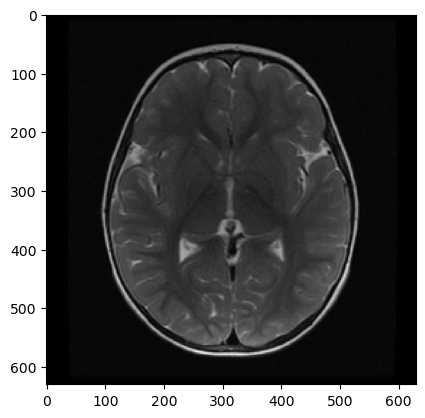

In [17]:
nor_img=mpimg.imread(r'C:\Users\Hamza\Downloads\brain_tumor_dataset\no\2 no.jpeg')

plt.imshow(nor_img)

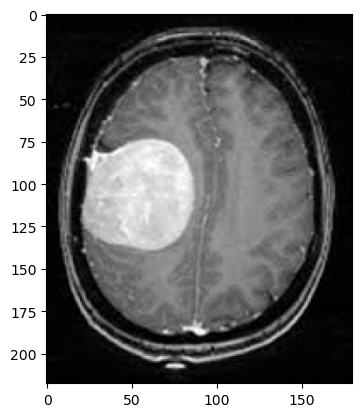

In [19]:
nor_img=mpimg.imread(r'C:\Users\Hamza\Downloads\brain_tumor_dataset\yes\Y1.jpg')

plt.imshow(nor_img)

c:\Users\Hamza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='count'>

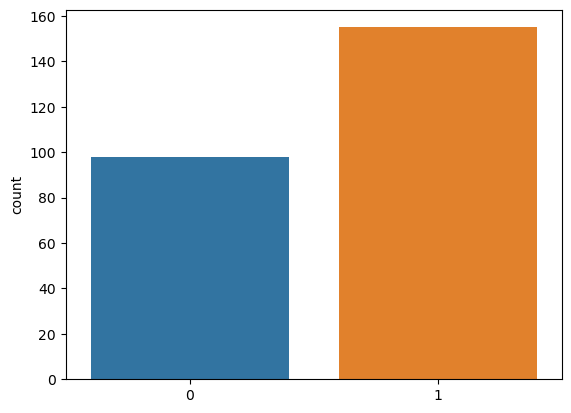

In [20]:
import seaborn as sn


sn.countplot(x=labels)

In [27]:
import os
from PIL import Image
import numpy as np

# Paths to datasets
normal_path = r'C:\Users\Hamza\Downloads\brain_tumor_dataset\no'
tumor_path = r'C:\Users\Hamza\Downloads\brain_tumor_dataset\yes'

# List files in the directories
normal_cells = os.listdir(normal_path)
tumor_cells = os.listdir(tumor_path)

# Print first and last 5 files for debugging
print(normal_cells[0:5])
print(normal_cells[-5:])
print(tumor_cells[0:5])
print(tumor_cells[-5:])

# Initialize the data list
data = []

# Process normal cells images
for img_file in normal_cells:
    full_path = os.path.join(normal_path, img_file)
    try:
        image = Image.open(full_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)
    except Exception as e:
        print(f"Error processing file {full_path}: {e}")

# Process tumor cells images
for img_file in tumor_cells:
    full_path = os.path.join(tumor_path, img_file)
    try:
        image = Image.open(full_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)
    except Exception as e:
        print(f"Error processing file {full_path}: {e}")

print(f"Processed {len(data)} images.")


['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg']
['No18.jpg', 'No19.jpg', 'No20.jpg', 'No21.jpg', 'No22.jpg']
['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg']
['Y95.jpg', 'Y96.jpg', 'Y97.JPG', 'Y98.JPG', 'Y99.JPG']
Processed 253 images.


In [28]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

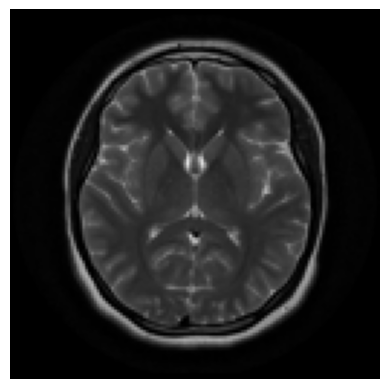

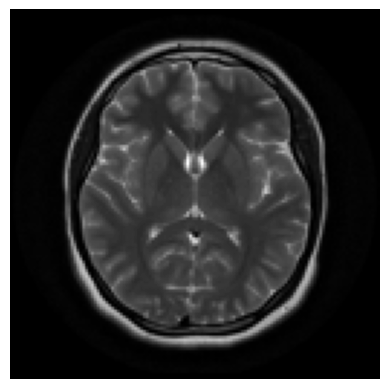

In [29]:
import matplotlib.pyplot as plt

# Select an image to visualize
sample_image = data[0]

# Display the image
plt.imshow(sample_image)
plt.axis('off')  # Hide the axis
plt.show()

# If you want to visualize the grayscale version of the image
gray_image = np.mean(sample_image, axis=-1)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()


In [30]:
type(data[0])

numpy.ndarray

In [31]:
data[0].shape

(128, 128, 3)

In [32]:
X=np.array(data)
Y=np.array(labels)

In [33]:
print(X.shape)
print(Y.shape)

(253, 128, 128, 3)
(253,)


In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=101)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(253, 128, 128, 3) (202, 128, 128, 3) (51, 128, 128, 3)


In [36]:
X_train=X_train/255
X_test=X_test/255

In [37]:
X_train[0]

array([[[0.11372549, 0.11372549, 0.11372549],
        [0.02745098, 0.02745098, 0.02745098],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.11372549, 0.11372549, 0.11372549],
        [0.02745098, 0.02745098, 0.02745098],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.11372549, 0.11372549, 0.11372549],
        [0.02745098, 0.02745098, 0.02745098],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.10980392, 0.10980392, 0.10980392],
        [0.02352941, 0.02352941, 0.02352941],
        [0.00392157, 0

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout

In [39]:
num_of_classes=2

model=Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_of_classes, activation='sigmoid'))

In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
history=model.fit(X_train,Y_train, epochs=50, validation_split=0.1, verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 656ms/step - accuracy: 0.6044 - loss: 4.4420 - val_accuracy: 0.5238 - val_loss: 4.3308
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 576ms/step - accuracy: 0.6820 - loss: 2.0149 - val_accuracy: 0.8095 - val_loss: 0.7646
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 564ms/step - accuracy: 0.7912 - loss: 0.5851 - val_accuracy: 0.8095 - val_loss: 1.2216
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 597ms/step - accuracy: 0.8770 - loss: 0.3624 - val_accuracy: 0.7619 - val_loss: 0.6144
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - accuracy: 0.9385 - loss: 0.1516 - val_accuracy: 0.8095 - val_loss: 0.7711
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 582ms/step - accuracy: 0.9773 - loss: 0.0841 - val_accuracy: 0.8095 - val_loss: 0.7859
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 601ms/step - accuracy: 0.9765 - loss: 0.0549 - val_accuracy: 0.8571 - val_loss: 0.7299
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 615ms/step - accuracy: 1.0000 - loss: 0.0223 - val_accuracy: 0.8571 - val_loss:

In [42]:
model.evaluate(X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8799 - loss: 0.7601


[0.7564196586608887, 0.8823529481887817]

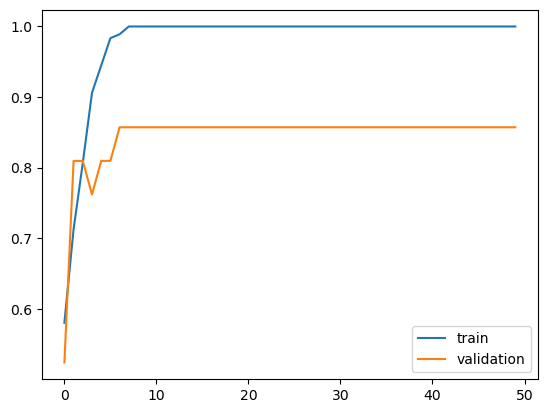

In [43]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')

plt.legend()
plt.show()

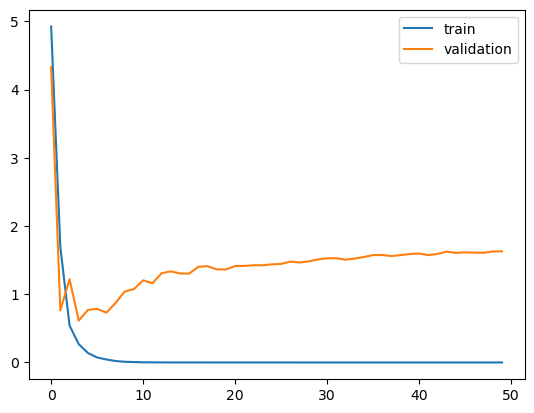

In [44]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.legend()
plt.show()

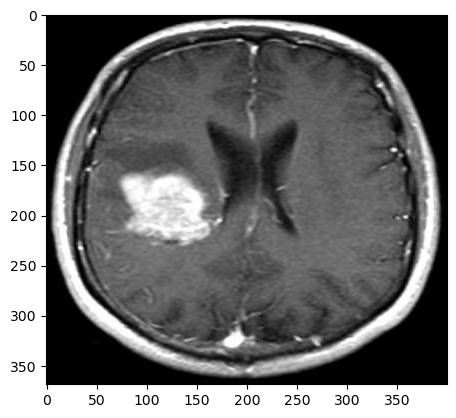

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction Probabilities are:   [[0.73804045 0.99979997]]
Tumor Cell


In [54]:
input_image_path=input('Enter the path of the image: ')

input_image=cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()


# Ensure the shape matches the expected input shape of your model
input_image_reshape=cv2.resize(input_image,(128,128))


# Normalize the pixel values
image_normalized=input_image_reshape/255


# Reshape for model prediction
img_reshape=np.reshape(image_normalized,(1,128,128,3))

# Make Predictions
input_prediction=model.predict(img_reshape)

# Display the prediction Probabilities
print('Prediction Probabilities are:  ',input_prediction)


# Get the Predicted Label
input_pred_label=np.argmax(input_prediction)


if input_pred_label ==1:
    print('Tumor Cell')
else:
    print('Normal Cell')